### **Step 1 : Setting the initial value**

In [105]:
import random
import matplotlib.pyplot as plt


In [106]:
capacity = 170
weights = [41, 50, 49, 59, 55, 57, 60]
profits = [442, 525, 511, 593, 546, 564, 617]
population_size = 50
generations = 100

### **Step 2 : Building the methods that the genetic_algorithm() requires**

In [107]:
def generate_random_individual():
    '''
    First of all, randomly generate a solution
    '''

    return [random.randint(0, 1) for _ in range(len(weights))]

In [108]:
def calculate_fitness(individual):
    '''
    Return total profit if total_weight <= self.capacity
    '''
    total_weight = sum(individual[i] * weights[i]
                           for i in range(len(weights)))
    total_profit = sum(individual[i] * profits[i]
                           for i in range(len(profits)))

    return total_profit if total_weight <= capacity else 0

In [109]:
def generate_initial_population():
    """
    generating initial population
    """

    return [generate_random_individual() for _ in range(population_size)]

In [110]:
def tournament_selection(population):
    """
    Using tournament selection method to select individuals
    """
    tournament_size = 3
    tournament_individuals = random.sample(population, tournament_size)

    return max(tournament_individuals, key=calculate_fitness)

In [111]:
def crossover(parent1, parent2):
    """
    Performing crossover, cutoff points are randomly generated.
    """
    crossover_point = random.randint(0, len(parent1) - 1)
    child = parent1[:crossover_point] + parent2[crossover_point:]

    return child

In [112]:
def mutation(individual):
    """
    Performing mutation, cutoff points are randomly generated.
    """
    mutation_point = random.randint(0, len(individual) - 1)
    individual[mutation_point] = 1 - individual[mutation_point]

    return individual

### **Step 3 : Executing the Genetic Algorithm**

In [113]:
def genetic_algorithm():
    """
    Execute the genetic algorithm,
        and collect the best fitness value of each generation during the convergence process
    """
    # randomly generate a solution
    population = generate_initial_population()
    # calculate its total profit
    convergence_values = [
        max([calculate_fitness(individual) for individual in population])]

    # iteration = 100
    for _ in range(generations):
        new_population = []

        for _ in range(population_size):

            parent1 = tournament_selection(population)
            parent2 = tournament_selection(population)
            child = crossover(parent1, parent2)

            if random.random() < 0.1:  # Mutation rate
                child = mutation(child)

            new_population.append(child)

        population = new_population

        # collect the convergence values
        convergence_values.append(
            max([calculate_fitness(individual) for individual in population]))

    return convergence_values

### **Step 4 : Charting the Convergence Values**

In [114]:
def plot_convergence(convergence_values):
    """
    Charting the Concessions
    """
    plt.plot(range(len(convergence_values)), convergence_values)
    plt.xlabel('Generations')
    plt.ylabel('Convergence Value')
    plt.title('Convergence Plot')
    plt.show()

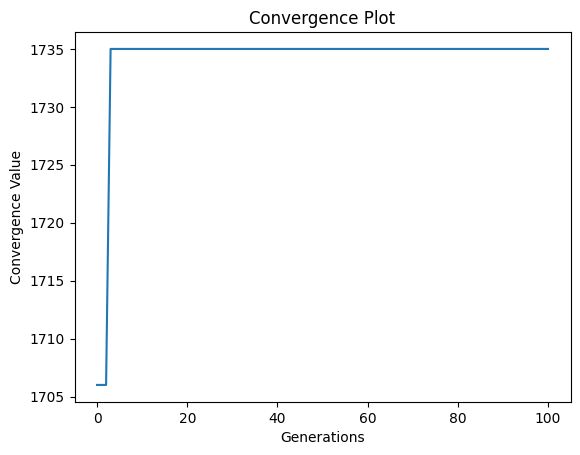

In [115]:
# Genetic algorithm
convergence_values = genetic_algorithm()

# Charting the Concessions
plot_convergence(convergence_values)